# 4 - Factors

Espen Sirnes  
2024-10-30

Factors are portfolios constructed based on specific characteristics of
assets. For example, Fama and French proposed factors based on company
valuation (over- or under-valuation) and company size.

# Construction of Factors

A standard, simplified method for constructing a factor portfolio
involves creating a long position in the third of assets with the
strongest characteristic (e.g., the most undervalued) and a short
position in the third with the weakest. For instance, the **HML** (High
Minus Low) factor by Fama and French takes a long position in the top
third of companies with the highest market-to-book value and shorts the
bottom third with the lowest.

This results in a portfolio with zero net cost because the long and
short positions offset each other. Hence, there’s no need to subtract
the risk-free rate when calculating returns for factor portfolios.

In Titlon, there are four factors: **SMB**, **HML**, **LIQ**, and
**MOM**, alongside the market factor (the market index).

-   **SMB (Small Minus Big):** The return of small companies minus the
    return of large companies.
-   **HML (High Minus Low):** The return of companies with high
    market-to-book ratios compared to those with low ratios.
-   **LIQ (Liquidity):** The return of the most liquid companies minus
    that of the least liquid.
-   **MOM (Momentum):** The return of companies with high momentum minus
    those with high reversal tendencies.

## Factor Model

The main purpose of factors is to be used in regression analysis, like
the following:

$$
\begin{array}{rl}
x - r_f = \alpha + \beta_M (r_M - r_f)  \\
+\beta_{SMB} \cdot SMB \\
+\beta_{HML} \cdot HML 
+\beta_{LIQ} \cdot LIQ \\
+\beta_{MOM} \cdot MOM
 + \epsilon
\end{array}
$$

This is a multifactor model. If we only include the market factor, the
model reduces to the well-known **CAPM** (Capital Asset Pricing Model).
Adding the additional factors results in a more comprehensive **factor
model**.

# Factors in Portfolio Evaluation

Numerous factors have been proposed in the literature. However, many are
believed to be the result of data mining, so it’s common practice to use
only the most established ones, like those mentioned above, when
evaluating portfolio performance.

The estimated $\alpha$ from the factor model is the most widely
recognized measure of risk-adjusted return. A positive $\alpha$
indicates that a portion of the excess return of $x - r_f$ cannot be
explained by exposure to any of the factors, including the market
factor. This implies that the portfolio has delivered some form of
risk-free excess return.

As in any regression, you can compute the standard error and p-value of
the estimated $\alpha$. This is crucial because, if the $\alpha$ is not
statistically significant, we cannot confidently conclude that it is
different from zero. Therefore, to claim that an asset or portfolio has
truly outperformed the market, its multifactor $\alpha$ should be both
positive and statistically significant.

# Historical Context

This framework is the standard method for determining whether a
portfolio manager has genuinely been skilled or simply benefited from
luck or factor exposures.

The field of finance has, in many ways, been driven by the need to
explain portfolio managers’ overperformance. In the early 20th century,
some managers appeared to consistently outperform the market. The
development of **CAPM** revealed that this was often due to selecting
stocks with high market risk rather than genuine skill. Most of these
managers did not generate CAPM alpha.

For investors seeking higher returns by taking on more market risk,
simply buying more shares (increasing exposure to the market) is
typically more cost-effective than picking the riskiest stocks. The
development of CAPM helped investors make more informed choices.

Similarly, the introduction of factor models showed that some managers
were merely betting on small-cap stocks or undervalued companies to
generate excess returns. When accounting for these factors, much of the
supposed excess return often disappears.

# Coding Challenges:

-   **Challenge 1**: - Download stock data from Titlon for a single
    stock. - Perform a multifactor regression model using the downloaded
    data. - Analyze the significance of the alpha: check whether it is
    statistically significant, and interpret its direction (positive or
    negative). - Provide commentary on what the result implies in terms
    of the stock’s performance relative to the factors.

-   **Challenge 2**: - Download factor data from Titlon and plot the
    performance of these factors alongside the optimal portfolio from
    the previous chapter. - Add each factor as a data point on the
    chart, allowing comparison between the factors and the optimal
    portfolio as well as the portfolio frontier. - Use the following SQL
    query in the Titlon script to retrieve the factor data:
    `sql       SELECT [SMB],[HML],[LIQ],[MOM]           FROM [OSE].[dbo].[factors]           WHERE YEAR([Date]) >= 2016` -
    Plot the performance and visually assess how each factor performs
    relative to the optimal portfolio.

## Tentative answer to Challenge 2:

We first download the factor data from titlon

First, let us just rerun the last few cells of the previous chapter, in
order to have the previous graph in the memory. That can is done with a
custom function `calc_notebook` in the module `functions,py`in this
directory. `d` contains the variable from those calculations.

In [2]:
import functions
d = functions.calc_notebook("3-lecture_optport.ipynb", 
              ["read_pickle","get_matrix", "cov_matrix", "A =", 
               "portfolio_front", "ax.plot"])
locals().update(d)

We then calculated the means and standard errors, after reducing the
frequency from daily to weekly.

In [3]:
import pandas as pd

df = pd.read_pickle('output/factors.df')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df_weekly = df.resample('W').sum()
df_weekly = df_weekly[['SMB', 'HML', 'LIQ', 'MOM']].dropna()
df = df[['SMB', 'HML', 'LIQ', 'MOM']].dropna()
means = df_weekly.mean()*52
std = df_weekly.std()*52**0.5
print(std)
print(means)
df_weekly

SMB    0.145195
HML    0.193652
LIQ    0.160615
MOM    0.216708
dtype: float64
SMB    0.074676
HML    0.145056
LIQ    0.019353
MOM    0.164041
dtype: float64

431 rows × 4 columns

We can then plot the factors in the existing porfolio frontier

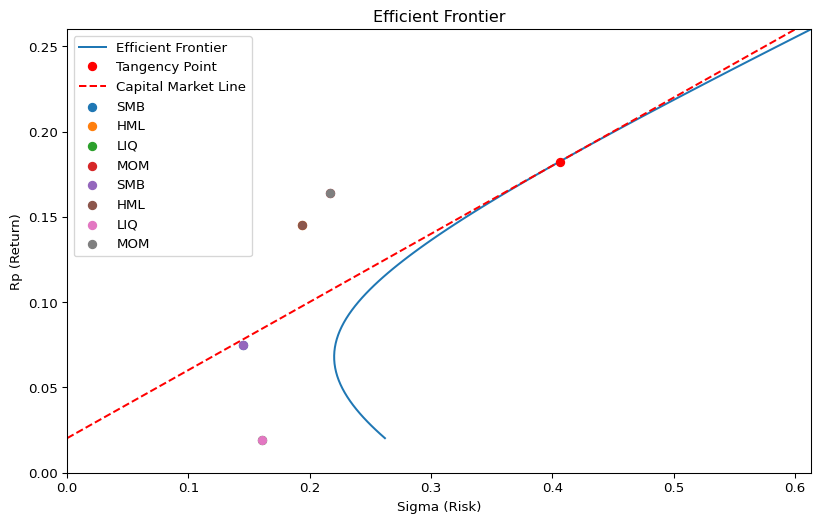

In [4]:
for series in means.index:
        ax.scatter(std[series], means[series], label=series)

ax.legend()

fig

Can you construct the optimal portfolio of the stocks and the factors?